<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf

# Get the data for the stock AAPL
start = '2014-09-17'

In [3]:
# Apple prediction

In [4]:
# Bringing data from yfinance to dataframe - Apple
df = yf.download('AAPL',start)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('apple_data.csv', encoding='utf-8', index=True)

In [6]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00-04:00,25.317499,25.450001,25.147499,25.395000,22.760479,243706000
2014-09-18 00:00:00-04:00,25.482500,25.587500,25.389999,25.447500,22.807535,149197600
2014-09-19 00:00:00-04:00,25.572500,25.587500,25.125000,25.240000,22.621563,283609600
2014-09-22 00:00:00-04:00,25.450001,25.535000,25.145000,25.264999,22.643967,211153600
2014-09-23 00:00:00-04:00,25.150000,25.735001,25.135000,25.660000,22.997988,253608800


In [8]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

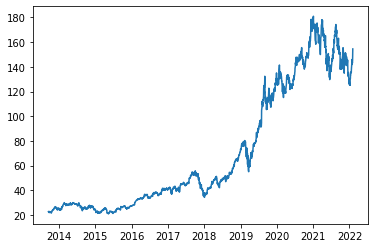

In [9]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [10]:
# length of dataframe
len(df)

2111

In [11]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [12]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[22.760478973388672,
 22.80753517150879,
 22.621562957763672,
 22.643966674804688,
 22.997987747192383,
 22.798572540283203,
 21.92919921875,
 22.574504852294922,
 22.43110466003418,
 22.574504852294922,
 22.222726821899414,
 22.38405418395996,
 22.321317672729492,
 22.321317672729492,
 22.126379013061523,
 22.585712432861328,
 22.635005950927734,
 22.570026397705078,
 22.36387825012207,
 22.126379013061523,
 21.855253219604492,
 21.568462371826172,
 21.884382247924805,
 22.35268211364746,
 22.959896087646484,
 23.0764102935791,
 23.48868751525879,
 23.576078414916992,
 23.55142593383789,
 23.91665267944336,
 24.051088333129883,
 23.970428466796875,
 24.198974609375,
 24.512666702270508,
 24.333412170410156,
 24.39166831970215,
 24.461427688598633,
 24.531192779541016,
 24.49068832397461,
 24.68646812438965,
 25.035274505615234,
 25.388582229614258,
 25.69462776184082,
 25.65187644958496,
 25.984926223754883,
 25.804899215698242,
 26.173959732055664,
 26.209962844848633,
 26.6960411071

In [13]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[123.9714126586914,
 122.46465301513672,
 124.79419708251953,
 124.80411529541016,
 125.63678741455078,
 126.02340698242188,
 125.01228332519531,
 126.24149322509766,
 129.34423828125,
 128.5115509033203,
 129.01710510253906,
 130.642822265625,
 129.32444763183594,
 131.14840698242188,
 132.81378173828125,
 132.5362091064453,
 132.24874877929688,
 131.9513702392578,
 133.60682678222656,
 135.14332580566406,
 135.76785278320312,
 136.0751495361328,
 138.74172973632812,
 140.78379821777344,
 143.3115997314453,
 141.99317932128906,
 143.84689331054688,
 143.24221801757812,
 144.37229919433594,
 147.85171508789062,
 147.1875762939453,
 145.11575317382812,
 141.21005249023438,
 144.87783813476562,
 144.13436889648438,
 145.5221710205078,
 147.26686096191406,
 147.693115234375,
 145.49244689941406,
 143.718017578125,
 144.37229919433594,
 144.59036254882812,
 144.2533416748047,
 146.0773162841797,
 145.67088317871094,
 145.77992248535156,
 145.08499145507812,
 145.03533935546875,
 144.548873

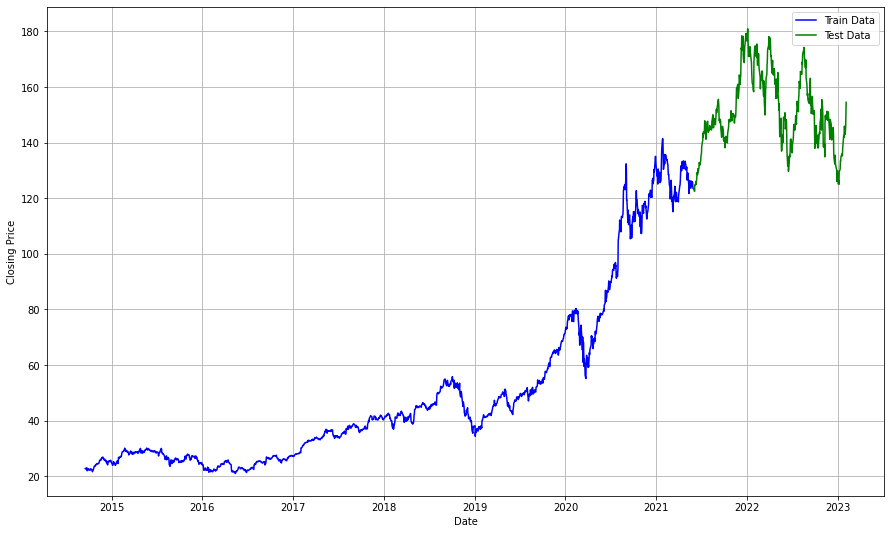

In [14]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [15]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [16]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [17]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2109
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -4153.094
Method:                       css-mle   S.D. of innovations              1.734
Date:                Sat, 04 Feb 2023   AIC                           8318.188
Time:                        15:33:50   BIC                           8352.112
Sample:                             1   HQIC                          8330.611
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0604      0.034      1.795      0.073      -0.006       0.126
ar.L1.D.y     -0.0582      0.022     -2.665      0.008      -0.101      -0.015
ar.L2.D.y     -0.0309      0.022     -1.415      0.1

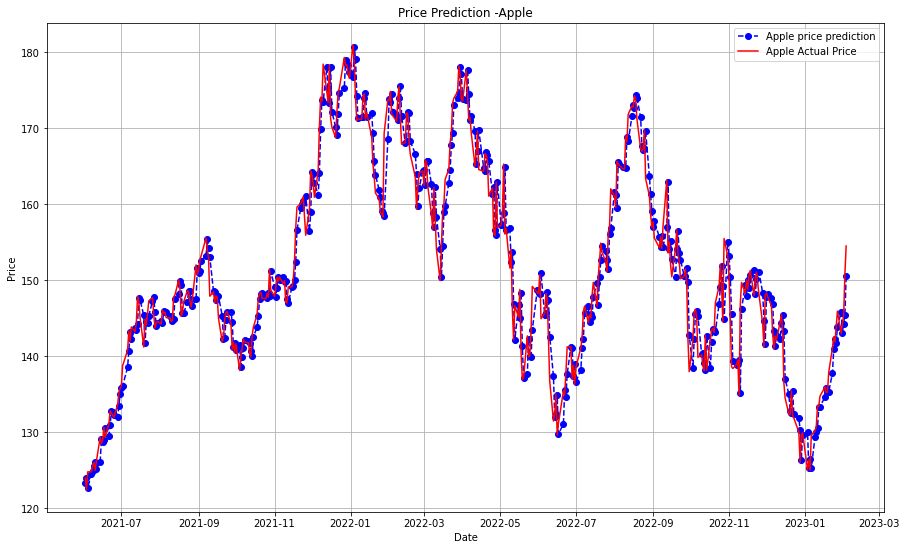

In [18]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Apple price prediction')
plt.plot(start_date, test, color ='red', label ='Apple Actual Price')
plt.title('Price Prediction -Apple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.014913580267741488


MAPE of 1.5% implies the model is 98.5% accurate in predicting the test obeservations

In [20]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 151.36348262633555
Mean Squared Error: 2.9812282582026053


In [21]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 154.1666385631636
Prediction 125.85582171937097
Prediction 124.1706208423373
Prediction 125.96273819222753
Prediction 125.13099120062533


In [22]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [23]:
#Reviewing dataframe
Prediction

,0
0,154.166639
1,125.855822
2,124.170621
3,125.962738
4,125.130991


In [24]:
#Conevrting dataframe to csv for visualization
Prediction.to_csv('Apple_prediction.csv', header='Prediction', index=True)